In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [26]:
file_path = r"D:\AI_ML_Task\archive\creditcard.csv"

In [27]:

# Load dataset
data = pd.read_csv(file_path)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [49]:
## Dataset Info:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [30]:
print("\nClass Distribution:")
print(data['Class'].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [51]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [32]:
def load_and_preprocess_data(data):

    X = data.drop('Class', axis=1)
    y = data['Class']
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test


In [33]:

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_and_preprocess_data(data)


C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [34]:
X_train

array([[ 1.51748169e+00,  8.04044127e-01, -7.30103635e-01, ...,
        -2.56433950e-03, -1.72345319e-01, -4.06477191e-01],
       [ 7.39543647e-01,  8.20273845e-01, -5.34473731e-01, ...,
        -8.41799115e-02, -2.60584742e-01, -4.25702390e-01],
       [-9.90902057e-01,  2.64537745e-01, -3.53182202e-01, ...,
        -4.55794512e-02,  3.50043783e-01,  3.38465958e-01],
       ...,
       [ 1.28394710e+00,  4.67547791e-01, -1.56863690e-01, ...,
         6.67700672e-03,  2.48061419e-01, -4.19570053e-01],
       [-2.81668831e-02,  2.99750151e-02, -2.28240265e-02, ...,
        -4.79678633e-01,  2.37762174e+00,  2.80384625e-01],
       [-1.28394506e+00, -3.93574488e+00,  3.30146730e+00, ...,
         1.49893667e+00,  9.39283994e-01,  4.97758097e-03]])

In [35]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
454897    1
454898    1
454899    1
454900    1
454901    1
Name: Class, Length: 454902, dtype: int64

### Supervised Training being started 

In [36]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib  

In [45]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    
    # Baseline model: Logistic Regression
    print("Training Logistic Regression...")
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    print("\nLogistic Regression Report:")
    print(classification_report(y_test, y_pred_log))
    
    # Saving log-regression model
    joblib.dump(log_reg, "logistic_regression_model.pkl")
    
    # XGBoost model
    print("Training XGBoost Classifier...")
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print("\nXGBoost Classifier Report:")
    print(classification_report(y_test, y_pred_xgb))
    
    # Save XGBoost model
    joblib.dump(xgb, "xgboost_model.pkl")
    
    # Plot ROC Curve for XGBoost
    y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
    plt.figure()
    plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_xgb)))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()



C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Logistic Regression...

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Training XGBoost Classifier...


C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\xgboost\core.py:158: UserWarning: [16:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



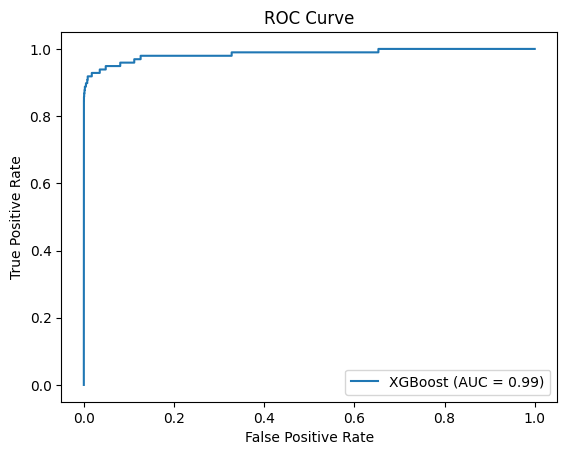

In [46]:
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_and_preprocess_data(data)
    train_and_evaluate(X_train, X_test, y_train, y_test)

In [47]:
print(f"Training set size: {X_train.shape}")

Training set size: (454902, 30)


### Define and Explain Model

In [48]:
import joblib
import matplotlib.pyplot as plt
import shap
import pandas as pd


Feature Importance:
   Feature  Importance
14     V14    0.676121
4       V4    0.061359
12     V12    0.032148
17     V17    0.023975
1       V1    0.016856
3       V3    0.016855
13     V13    0.013714
8       V8    0.013663
10     V10    0.010230
21     V21    0.010172
9       V9    0.009979
7       V7    0.009240
18     V18    0.009150
29  Amount    0.008449
26     V26    0.008091
11     V11    0.007256
28     V28    0.007222
16     V16    0.007144
2       V2    0.006676
0     Time    0.006537
19     V19    0.006457
22     V22    0.006208
23     V23    0.006139
15     V15    0.005419
25     V25    0.004845
20     V20    0.004174
24     V24    0.004146
5       V5    0.003173
6       V6    0.002873
27     V27    0.001731


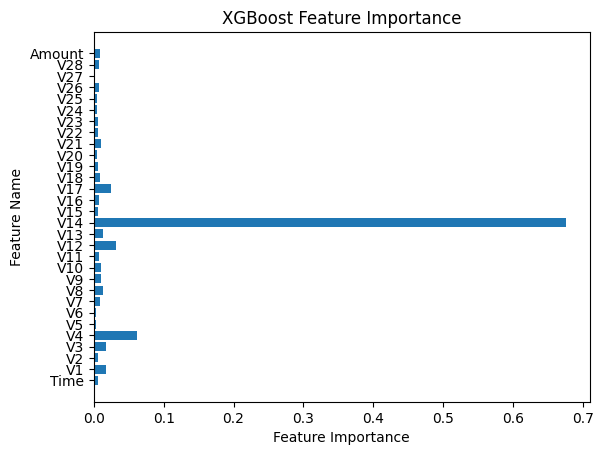

In [52]:
# Load the trained model
xgb = joblib.load("xgboost_model.pkl")

# Calculate feature importance
print("Feature Importance:")
importance = xgb.feature_importances_
feature_names = pd.read_csv(file_path).drop("Class", axis=1).columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
print(importance_df.sort_values(by="Importance", ascending=False))

# Plot feature importance
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.show()

In [53]:

def explain_model(X_train):
    # Explain predictions using SHAP
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values, X_train, feature_names=feature_names)



C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


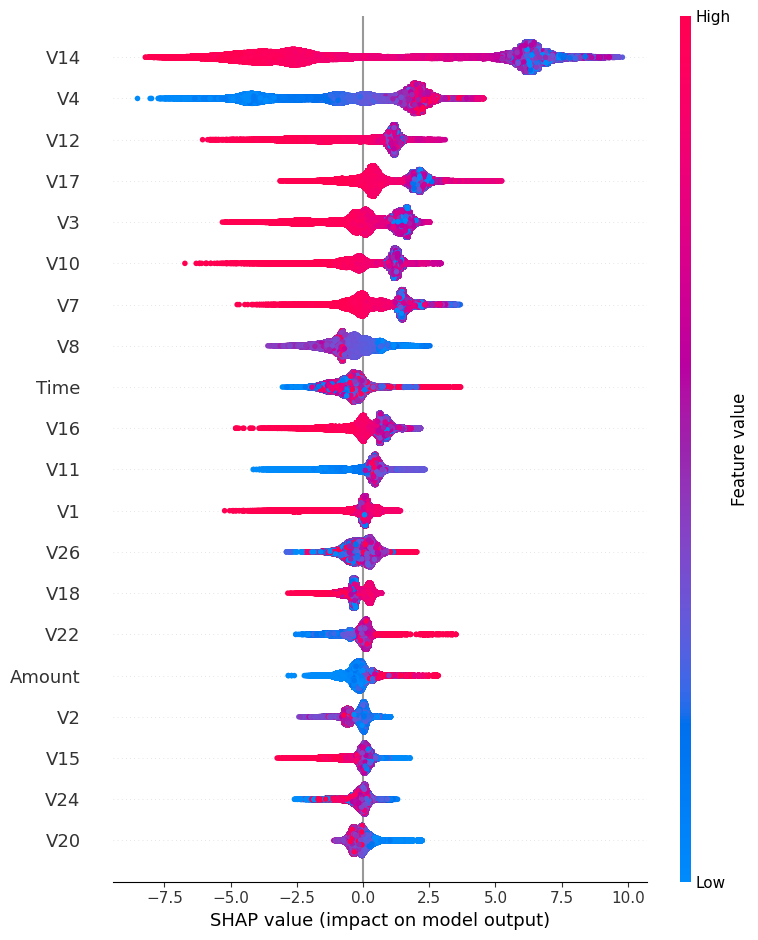

In [54]:
file_path = r"D:\AI_ML_Task\archive\creditcard.csv"

if __name__ == "__main__":
    X_train, _, _, _ = load_and_preprocess_data(data)
    explain_model(X_train)

In [57]:
import xgboost as xgb

# Prepare data for DMatrix (required by XGBoost's cv function)
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define parameter grid
param_grid = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 200,
}

# Perform cross-validation
cv_results = xgb.cv(
    params=param_grid,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=3,
    metrics='auc',
    as_pandas=True,
    seed=42
)

print(cv_results)


C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\xgboost\core.py:158: UserWarning: [17:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\miniconda3\envs\aiml\lib\site-packages\xgboost\core.py:158: UserWarning: [17:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.993935       0.000175       0.993774      0.000169
1         0.995014       0.000418       0.994777      0.000476
2         0.996225       0.000242       0.996094      0.000343
3         0.996867       0.000064       0.996775      0.000100
4         0.997082       0.000136       0.996999      0.000118
..             ...            ...            ...           ...
95        0.999958       0.000007       0.999914      0.000012
96        0.999958       0.000007       0.999914      0.000011
97        0.999960       0.000007       0.999917      0.000015
98        0.999963       0.000009       0.999919      0.000015
99        0.999964       0.000009       0.999920      0.000015

[100 rows x 4 columns]
